In [1]:
import numpy as np

## Problem 1.5

In [2]:
l = var('lambda_')
w = var('omega_')
A = var('A')
t = var('t')
k = var('k')
E = var('E')
m = var('m')
p = var('p')
assume(l > 0)
assume(w > 0)
assume(A, w, t, l, k, w, m, 'real')
assume(t > 0)
assume(m > 0)
assume(l, w, k, A, m, 'constant')

Phi(x)= A * e^(-l * abs(x)) * e^(-i * w * t)
show('Φ', Phi)

# Define Φ in two halves to avoid the abs(x)
PhiL(x) = A * e^(-l * -x)
show(PhiL, x <= 0)

PhiR(x) = A * e^(-l * x)
show(PhiR, x > 0)

'Φ' x |--> A*e^(-I*omega_*t - lambda_*abs(x))

x |--> A*e^(lambda_*x) x <= 0

x |--> A*e^(-lambda_*x) x > 0

### a) Normalise $\Phi$, i.e. find A which makes total area 1

In [3]:
IL = integrate(PhiL * conjugate(PhiL), x)
IR = integrate(PhiR * conjugate(PhiR), x)
show(IL, IR)

show('Area = ', IL(0), '-', IL(-oo), '+', IR(oo), '-', IR(0), '=', IL(0) - IL(-oo) + IR(oo) - IR(0), ' = 1')
show('A = ', sqrt(l))

x |--> 1/2*A^2*e^(2*lambda_*x)/lambda_ x |--> -1/2*A^2*e^(-2*lambda_*x)/lambda_

'Area = ' 1/2*A^2/lambda_ '-' 0 '+' 0 '-' -1/2*A^2/lambda_ '=' A^2/lambda_ ' = 1'

'A = ' sqrt(lambda_)

### b) Find the mean postition of x <x>

In [4]:
IL = integrate(PhiL * x * conjugate(PhiL), x)
IR = integrate(PhiR * x * conjugate(PhiR), x)
show(IL, IR)

xbar = (IL(0) - 0) + (0 - IR(0))

show(IL(0), IR(0))
show('<x> =', xbar)

x |--> 1/4*(2*lambda_*x - 1)*A^2*e^(2*lambda_*x)/lambda_^2 x |--> -1/4*(2*lambda_*x + 1)*A^2*e^(-2*lambda_*x)/lambda_^2

-1/4*A^2/lambda_^2 -1/4*A^2/lambda_^2

'<x> =' 0

### c) Find the expectation of $x^2$

In [5]:
IL = integrate(PhiL * x^2 * conjugate(PhiL), x)
IR = integrate(PhiR * x^2 * conjugate(PhiR), x)
show(IL, IR)

show(IL(0), IR(0))
x2bar = (IL(0) - 0) + (0 - IR(0))
show('<x^2> = ', x2bar)

x |--> 1/4*(2*lambda_^2*x^2 - 2*lambda_*x + 1)*A^2*e^(2*lambda_*x)/lambda_^3 x |--> -1/4*(2*lambda_^2*x^2 + 2*lambda_*x + 1)*A^2*e^(-2*lambda_*x)/lambda_^3

1/4*A^2/lambda_^3 -1/4*A^2/lambda_^3

'<x^2> = ' 1/2*A^2/lambda_^3

### Problem 1.9

In [6]:
a=var('a')
A=var('A')
h=var('h')
m=var('m')
assume(A, a, m, h, t, 'real')
assume(A>0, h>0, m>0, a>0, t>0)
Phi(x) = A * e^-(a*(m*x^2 / h))
show(Phi)

area = integrate(Phi * Phi, x, -oo, oo)
show('area=',area)
A2 = 1 / area
show('A2=', A2)


x |--> A*e^(-a*m*x^2/h)

'area=' 1/2*sqrt(2)*sqrt(pi)*A^2/sqrt(a*m/h)

'A2=' sqrt(2)*sqrt(a*m/h)/(sqrt(pi)*A^2)

In [7]:
# Phi(x,t) = (2 * a * m / (pi * h))^(1/4) * e^(-a*((m * x^2/h) + i*t))
Phi(x,t) = e^-((x^2/h + i*t))
show(Phi)

(x, t) |--> e^(-I*t - x^2/h)

In [8]:
J = integrate(Phi * conjugate(Phi), x, -oo, oo)
show(J)

t |--> 1/2*sqrt(2)*sqrt(pi)*sqrt(h)

In [9]:
# For what V(x) is this a solution to SE?
V(x, t ) = (h / i) * (1 / Phi) * ((i * h / (2 * m)) * Phi.diff(x).diff(x) - Phi.diff(t))
show(V)

(x, t) |--> -I*h*(I*h*(2*x^2*e^(-I*t - x^2/h)/h^2 - e^(-I*t - x^2/h)/h)/m + I*e^(-I*t - x^2/h))*e^(I*t + x^2/h)

In [10]:
show(V(x, 0))

-I*h*(I*h*(2*x^2*e^(-x^2/h)/h^2 - e^(-x^2/h)/h)/m + I*e^(-x^2/h))*e^(x^2/h)

In [11]:
a = 1 # var('a')
n = var('n')
# assume(a, 'real')
# assume(a > 0)
assume(n, 'integer')
assume(n > 0)

Phi(x) = sqrt(30/a^5) * x * (a - x)

cn(n) = sqrt(2/a) * integrate(sin(pi * n * x / a) * Phi(x), x, 0, a)
show(cn)

n |--> -2*sqrt(30)*sqrt(2)*((-1)^n/(pi^3*n^3) - 1/(pi^3*n^3))

In [12]:
sum([cn(n) for n in range(1,7)])

14108/3375*sqrt(30)*sqrt(2)/pi^3

x |--> 4/729*sqrt(30)*sqrt(2)*sin(9*pi*x)/pi^3 + 4/343*sqrt(30)*sqrt(2)*sin(7*pi*x)/pi^3 + 4/125*sqrt(30)*sqrt(2)*sin(5*pi*x)/pi^3 + 4/27*sqrt(30)*sqrt(2)*sin(3*pi*x)/pi^3 + 4*sqrt(30)*sqrt(2)*sin(pi*x)/pi^3

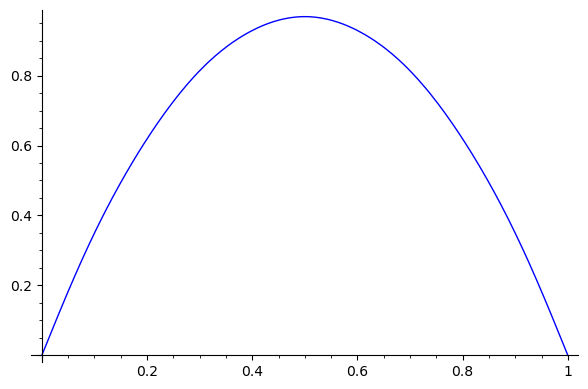

In [13]:

Phis(x) = sum([cn(n) * sin(n * pi * x / a) for n in range(1,10)])
show(Phis)
plot(Phis, 0,a)

In [14]:
show(cn(1))
show(cn(2))
show(cn(3))

4*sqrt(30)*sqrt(2)/pi^3

0

4/27*sqrt(30)*sqrt(2)/pi^3

In [15]:
a=1;
hbar=1;
m=1;
n=var('n')
x=var('x')
t=var('t')

In [16]:
En(n)=n^2*pi^2*hbar^2/(2*m*a^2);
psi(x,t,n) = sqrt(2/a)*sin(n*pi*x/a*exp(-i*En(n)*t/hbar));
psiStar(x,t,n)=sqrt(2/a)*sin(n*pi*x/a*exp(i*En(n)*t/hbar));

In [17]:
g(x) = sqrt(3/a)*(1-abs(x-a/2)/(a/2));

In [18]:
cn(n)=integral(g(x)*psi(x,0,n), x, 0, a/2) + integral(g(x)*psi(x,0,n),x,a/2,a);

In [19]:
show(cn)

n |--> sqrt(3)*sqrt(2)*(pi*n*cos(1/2*pi*n) + 2*sin(1/2*pi*n))/(pi^2*n^2) - sqrt(3)*sqrt(2)*(pi*n*cos(1/2*pi*n) - 2*sin(1/2*pi*n))/(pi^2*n^2)

In [20]:
cn

n |--> sqrt(3)*sqrt(2)*(pi*n*cos(1/2*pi*n) + 2*sin(1/2*pi*n))/(pi^2*n^2) - sqrt(3)*sqrt(2)*(pi*n*cos(1/2*pi*n) - 2*sin(1/2*pi*n))/(pi^2*n^2)

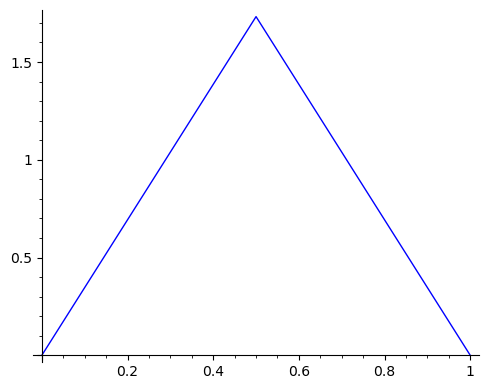

In [21]:
plot(g,0,a,figsize=[5,4])

In [22]:
show([cn(i) for i in range(1,10)])

[4*sqrt(3)*sqrt(2)/pi^2,
 0,
 -4/9*sqrt(3)*sqrt(2)/pi^2,
 0,
 4/25*sqrt(3)*sqrt(2)/pi^2,
 0,
 -4/49*sqrt(3)*sqrt(2)/pi^2,
 0,
 4/81*sqrt(3)*sqrt(2)/pi^2]

## Looking at free particle wave packets

In [23]:
a = 5 # var('a')
m = 1 # var('m')
hbar=1 # var('h')
psiInit(x) = 1/sqrt(2*a)

In [24]:
normCheck = integral(psiInit(x) * psiInit(x), x, -a, a)
normCheck
assert normCheck == 1

In [25]:
psik(k) = 1/sqrt(2 * pi) * integral(1/sqrt(2*a) * e^(-i * k * x), x, -a, a)

In [26]:
show(psik)

k |--> 1/20*sqrt(10)*sqrt(2)*(-I*e^(5*I*k)/k + I*e^(-5*I*k)/k)/sqrt(pi)